In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
lifeexp = pd.read_csv("../../datasets/life_exp.csv")

# Feature selection vježba
Korištenjem feature selection metoda odredite koje varijable bi vam bile korisne pri prognoziranju ciljne varijable Life_Expectancy

Dataset nema missing values kao ni outliere tako da se s time ne moramo zamarati

In [3]:
lifeexp

,Unnamed: 0,Life_Expectancy,Average_Temperature,Daily_Screen_Time,Health_Index,Income,Country,Diet_Type,Government_Health_Policy
0,0,72.483571,17.923146,4.357787,71.654576,74294.715447,Country B,Vegetarian,1.0
1,1,69.308678,22.896773,4.560785,68.748497,73109.928448,Country B,Non-Vegetarian,1.0
2,2,73.238443,23.286427,5.083051,73.985736,78248.930090,Country C,Vegetarian,1.0
3,3,77.615149,20.988614,5.053802,78.225520,82709.110470,Country C,Vegan,1.0
4,4,68.829233,24.193571,2.622331,68.808332,72929.102183,Country A,Vegetarian,1.0
...,...,...,...,...,...,...,...,...,...
95,95,62.682425,26.926587,3.307090,62.213250,68760.245347,Country C,Non-Vegetarian,1.0
96,96,71.480601,20.580713,4.899600,69.767467,74406.109077,Country A,Non-Vegetarian,1.0
97,97,71.305276,25.768626,4.307300,72.659149,75924.599005,Country B,Non-Vegetarian,1.0
98,98,70.025567,25.291044,4.812862,69.911027,73274.330776,Country C,Non-Vegetarian,1.0


In [4]:
lifeexp.describe()

,Unnamed: 0,Life_Expectancy,Average_Temperature,Daily_Screen_Time,Health_Index,Income,Government_Health_Policy
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0
mean,49.500000,69.480767,25.111523,4.064896,69.587608,74368.758472,1.0
std,29.011492,4.540842,4.768345,1.084283,4.475948,4744.899489,0.0
min,0.000000,56.901274,15.406144,0.758733,59.054457,62441.446464,1.0
25%,24.750000,66.995472,20.971697,3.344556,66.820378,70968.995974,1.0
50%,49.500000,69.365219,25.420536,4.097696,69.626849,74399.904642,1.0
75%,74.250000,72.029760,27.690852,4.704437,72.651242,78126.987900,1.0
max,99.000000,79.261391,38.600846,7.852731,79.173729,86449.739694,1.0


In [5]:
lifeexp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                100 non-null    int64  
 1   Life_Expectancy           100 non-null    float64
 2   Average_Temperature       100 non-null    float64
 3   Daily_Screen_Time         100 non-null    float64
 4   Health_Index              100 non-null    float64
 5   Income                    100 non-null    float64
 6   Country                   100 non-null    object 
 7   Diet_Type                 100 non-null    object 
 8   Government_Health_Policy  100 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 7.2+ KB


In [6]:
lifeexp.corr(numeric_only = True)

,Unnamed: 0,Life_Expectancy,Average_Temperature,Daily_Screen_Time,Health_Index,Income,Government_Health_Policy
Unnamed: 0,1.000000,0.044508,0.006198,-0.089520,0.043373,0.029239,NaN
Life_Expectancy,0.044508,1.000000,-0.136422,0.190840,0.980875,0.895932,NaN
Average_Temperature,0.006198,-0.136422,1.000000,-0.036632,-0.141879,-0.045018,NaN
Daily_Screen_Time,-0.089520,0.190840,-0.036632,1.000000,0.193556,0.135069,NaN
Health_Index,0.043373,0.980875,-0.141879,0.193556,1.000000,0.895719,NaN
Income,0.029239,0.895932,-0.045018,0.135069,0.895719,1.000000,NaN
Government_Health_Policy,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

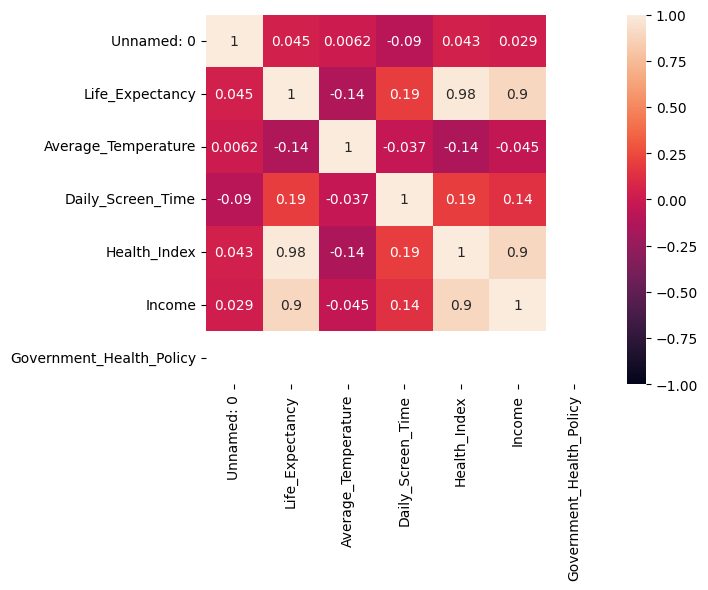

In [7]:
sns.heatmap(lifeexp.corr(numeric_only = True), vmin=-1, vmax=1, annot=True)

In [8]:
model = ols('Life_Expectancy ~ C(Country) + C(Diet_Type) + C(Country):C(Diet_Type)', data=lifeexp).fit()

In [9]:
anova_table = sm.stats.anova_lm(model, typ=2)

In [10]:
anova_table

,sum_sq,df,F,PR(>F)
C(Country),28.499972,2.0,0.706552,0.496028
C(Diet_Type),71.087330,2.0,1.762349,0.177448
C(Country):C(Diet_Type),115.615265,4.0,1.433128,0.229411
Residual,1835.319446,91.0,NaN,NaN


## Rješenje:
Mičemo sve varijable osim Income

Korelacijska metoda te Anova analiza su nam pokazale kako nema utjecaja tih varijabli na Life_expectancy

Naglasak: ovo je rezultat analize na podacima koje imamo

provjera - napravit ćemo boxplotove gdje ćemo usporediti zemlju i tip prehrane s očekivanim životnim vijekom...

/tmp/ipykernel_17319/2779546637.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y='Life_Expectancy', data=lifeexp, palette='viridis')


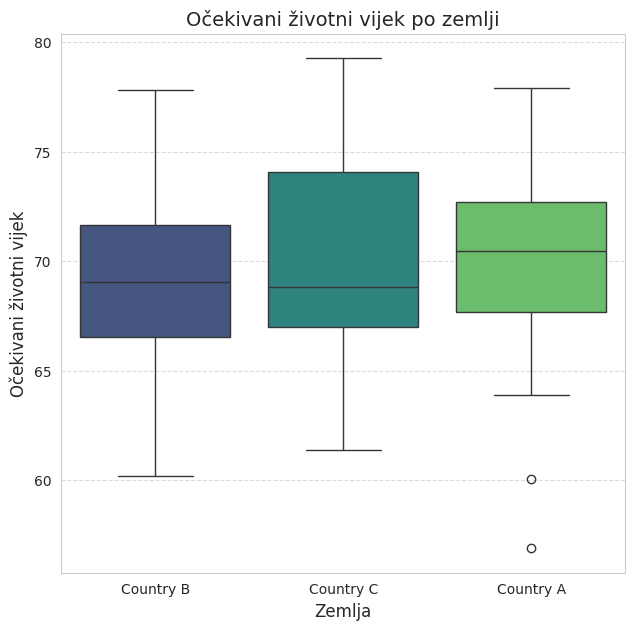

In [11]:
# Postavljanje stila za plotove
sns.set_style("whitegrid")

plt.figure(figsize=(16, 7)) # Povećavamo veličinu figure za bolji prikaz

# Box plot za Life_Expectancy po Country
plt.subplot(1, 2, 1) # 1 red, 2 stupca, prvi plot
sns.boxplot(x='Country', y='Life_Expectancy', data=lifeexp, palette='viridis')
plt.title('Očekivani životni vijek po zemlji', fontsize=14)
plt.xlabel('Zemlja', fontsize=12)
plt.ylabel('Očekivani životni vijek', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7) # Dodajemo mrežu na y-osi

/tmp/ipykernel_17319/334417189.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Diet_Type', y='Life_Expectancy', data=lifeexp, palette='plasma')


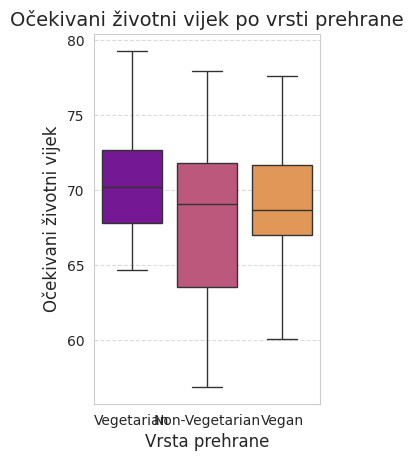

In [12]:
# Box plot za Life_Expectancy po Diet_Type
plt.subplot(1, 2, 2) # 1 red, 2 stupca, drugi plot
sns.boxplot(x='Diet_Type', y='Life_Expectancy', data=lifeexp, palette='plasma')
plt.title('Očekivani životni vijek po vrsti prehrane', fontsize=14)
plt.xlabel('Vrsta prehrane', fontsize=12)
plt.ylabel('Očekivani životni vijek', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7) # Dodajemo mrežu na y-osi

In [13]:
lifeexp.drop(columns=['Government_Health_Policy', 'Daily_Screen_Time', 'Country', 'Diet_Type', 'Average_Temperature', 'Health_Index' ], inplace=True)

In [14]:
lifeexp.head()

,Unnamed: 0,Life_Expectancy,Income
0,0,72.483571,74294.715447
1,1,69.308678,73109.928448
2,2,73.238443,78248.930090
3,3,77.615149,82709.110470
4,4,68.829233,72929.102183


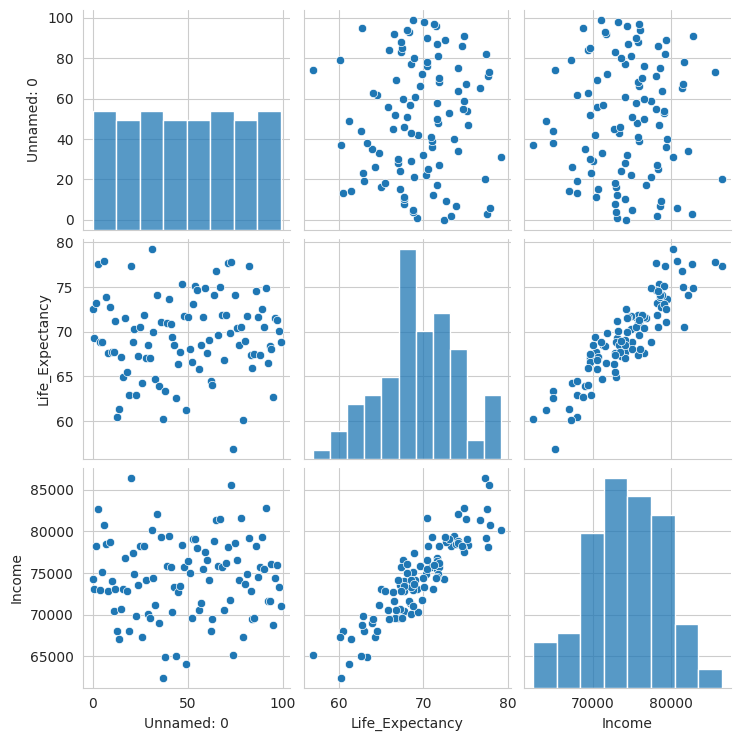

In [15]:
sns.pairplot (lifeexp)